-------------

## Load auditcblock from Audit Analytics

In [1]:
import wrds

In [2]:
conn=wrds.Connection()

Enter your WRDS username [yjaey]: yjaeyoon
Enter your password: ···············


WRDS recommends setting up a .pgpass file.


Create .pgpass file now [y/n]?:  y


Created .pgpass file successfully.
Loading library list...
Done


----------

## Check audit analytics library

In [3]:
conn.list_tables(library='audit')

['accfiler',
 'auditcblock',
 'auditchange',
 'auditfees',
 'auditfeesr',
 'auditlegal',
 'auditnonreli',
 'auditopin',
 'auditordur',
 'auditors',
 'auditorsinfo',
 'auditsox302',
 'auditsox404',
 'bankrupt',
 'bdfrep',
 'benefit',
 'commlett',
 'commlettconv',
 'commlettthreads',
 'currengbdfrep',
 'currengnpsaud',
 'diroffichange',
 'f01audaff',
 'f01audeve',
 'f01audevetoaud',
 'f01audevetyp',
 'f01audloc',
 'f01secloc',
 'f05audopitogoiconiss',
 'f05goiconiss',
 'f06forapdiv',
 'f06forapfil',
 'f06forapnotdiv',
 'f18meracq',
 'f18meracqfil',
 'f18meracqtratyp',
 'f27aud',
 'f27corpos',
 'f27docdet',
 'f27docdetfil',
 'f27per',
 'f27perfil',
 'f27perpos',
 'f27secloc',
 'f28aud',
 'f28foucod',
 'f28ntecod',
 'f28ntecomcod',
 'f28subclacod',
 'f29aud',
 'f29corpos',
 'f29docdet',
 'f29docdetfil',
 'f29per',
 'f29perfil',
 'f29perpos',
 'f29secloc',
 'f30aud',
 'f30foucod',
 'f30ntecod',
 'f30ntecomcod',
 'f30subclacod',
 'f34audopitogoiconiss',
 'f34forapdiv',
 'f34forapfil',
 'f34f

## Check auditcblock dataset

In [4]:
auditcblock_vars= conn.describe_table(library='audit', table='auditcblock')['name']
print(len(auditcblock_vars), '\n')
for var in auditcblock_vars:
    print(var)

Approximately 363358 rows in audit.auditcblock.
255 

bus_addr
mail_addr
company_fkey
parent_co_fkey
parent_co_name
ult_parent_co_fkey
ult_parent_co_name
name
short_name
former_name1
name_change_date1_str
former_name2
name_change_date2_str
former_name3
name_change_date3_str
sic_code_fkey
sic_code_descrip
naics_code_fkey
naics_code_descrip
loc_state
loc_state_name
loc_state_region
loc_state_country
inc_state
inc_state_name
inc_state_region
inc_state_country
fiscal_ye
bus_street1
bus_street2
bus_city
bus_state
bus_state_name
bus_state_region
bus_state_country
bus_zip
bus_phone
mail_street1
mail_street2
mail_city
mail_state
mail_state_name
mail_state_region
mail_state_country
mail_zip
is_in_sp500
is_in_nasdaq_composite
is_in_djia30
is_in_russell_2000
best_edgar_ticker
market
irs_number
curr_aud_fkey
curr_aud_name
curr_aud_aff_fkey
curr_aud_aff_nam
curr_aud_aff_hom_off_sta
curr_aud_aff_hom_off_sta_nam
curr_aud_aff_hom_off_sta_reg
curr_aud_aff_is_pca_reg
curr_aud_aff_pca_reg_num
curr_audsnc

--------

## Load data

In [7]:
vars_to_keep= ['company_fkey', 'name', 'short_name', 'sic_code_fkey', 'sic_code_descrip']

auditcblock= conn.get_table(library= 'audit', table='auditcblock',
                       columns= vars_to_keep)
print(auditcblock.shape)
auditcblock.head()

(363358, 5)


,company_fkey,name,short_name,sic_code_fkey,sic_code_descrip
0,0000000020,K TRON INTERNATIONAL INC,K TRON INTL,3823,"Industrial Instruments for Measurement, Displa..."
1,0000001750,AAR CORP,AAR,3720,Aircraft & Parts
2,0000001800,ABBOTT LABORATORIES,ABBOTT LABS,2834,Pharmaceutical Preparations
3,0000001830,ABCO INC,ABCO,9995,Non-Operating Establishments
4,0000001841,ABEL/NOSER CORP.,ABEL,None,None


--------

## Rename variables

In [8]:
auditcblock.rename(columns={'company_fkey':'c',
                           'sic_code_fkey':'sic',
                           'sic_code_descrip':'sicd'},
                  inplace= True)

## Delete if sic is missing

In [8]:
auditcblock= auditcblock[auditcblock.sic.notnull()]
auditcblock.shape
auditcblock['c']= auditcblock['c'].astype(int)
auditcblock['sic']= auditcblock['sic'].astype(int)

In [9]:
print(auditcblock.shape)
auditcblock.head()

(47281, 5)


,c,name,short_name,sic,sicd
0,20,K TRON INTERNATIONAL INC,K TRON INTL,3823,"Industrial Instruments for Measurement, Displa..."
1,1750,AAR CORP,AAR,3720,Aircraft & Parts
2,1800,ABBOTT LABORATORIES,ABBOTT LABS,2834,Pharmaceutical Preparations
3,1830,ABCO INC,ABCO,9995,Non-Operating Establishments
5,1848,ABERCROMBIE & FITCH CO,ABERCROMBIE & FITCH,5600,Retail-Apparel & Accessory Stores


In [11]:
auditcblock['sic1']= auditcblock['sic']//1000
auditcblock['sic2']= auditcblock['sic']//100

-----

## Industry check

<AxesSubplot:xlabel='sic1'>

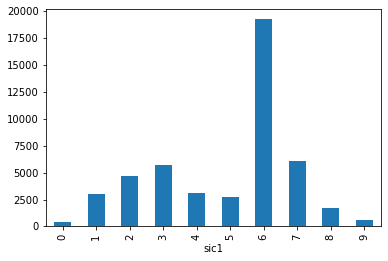

In [25]:
auditcblock.groupby('sic1')['sic1'].size().plot(kind='bar')

--------

## Save data

In [28]:
auditcblock.to_csv('data\\aa_auditcblock.csv')

--------